Центр непрерывного образования

# Программа «Python для автоматизации и анализа данных»

Неделя 4 - 1

*Ян Пиле, НИУ ВШЭ*  

# Устройство функций в Python. Написание простейших функций. Lambda-функции. Функция map(). Написание сложных функций. Декораторы, Генераторы, Рекурсия.

### Что такое функция в Python?

По своей сути функции в Python практически ничем не отличаются от функций из других языков программирования. Функцией называют именованный фрагмент программного кода, к которому можно обратиться из другого места вашей программы (но есть lambda-функции, у которых нет имени, о них будет рассказано в конце урока). Как правило, функции создаются для работы с данными, которые передаются ей в качестве аргументов, также функция может формировать некоторое возвращаемое значение. 

### Объявляя функцию, нужно следовать определенным правилам:

Объявление происходит с помощью ключевого слова **def**, за ним идёт имя функции и круглые скобки ().

**Аргументы**, передаваемые в функцию, должны находится в круглых скобках. Там же можно определить их значения по умолчанию, указав их после знака равно.

Перед основным содержимым желательно включить **строку документации** (docstring), которая обычно описывает назначение  и основные принципы работы функции.

**Тело функции** начинается после знака двоеточия. Важно не забыть об отступах.

Чтобы выйти из функции в Python, используют оператор **return [значение]**. Если оператор опущен, будет возвращено значение None.

Функцию можно объявить где угодно: внутри модуля, класса или другой функции. Если она объявляет внутри класса, то называется методом класса и вызывается так: *class_name.function()*.

In [5]:
list(map(str,[1,2,3,4]))

['1', '2', '3', '4']

In [2]:
def Имя(аргументы):
    '''
    Документация
    '''
    Тело (инструкции)
    return None

In [1]:
from scipy.stats import ttest_ind
ttest_ind??

In [2]:
lst = [3,2,1,5]

In [4]:
l = lst.sort()

print(l, lst)

None [1, 2, 3, 5]


На самом деле мы уже использовали огромное количество функций и методов (str(), float(), .add(), .count() и так далее). 

Попробуем самостоятельно реализовать функцию, складывающую два числа и выводящую результат на печать:

In [23]:
def summarize(a, b):
    '''
    Я суммирую два числа
    '''
#     summ = a + b
#     print(summ)
    assert type(a) == int and type(b) == int
    
    return a + b


     # вернёт None (Для любителей С++ это +- то же самое, что return 0)

In [24]:
x = summarize(1,2)
print(x)

3


In [25]:
b = summarize('a','vv')

AssertionError: 

In [26]:
1/0

ZeroDivisionError: division by zero

In [27]:
summarize(1)

TypeError: summarize() missing 1 required positional argument: 'b'

Теперь эту функцию в любом месте кода можно вызвать:

In [14]:
aaa = ['a', 'b']
x = summarize(*aaa)

In [15]:
x

'ab'

In [30]:
def mean_value(x):
    
    assert type(x) in (list, tuple)
    
    return sum(x)/len(x)

In [31]:
mean_value([1,2,3,4])

2.5

In [32]:
x = [1,2,3,4,5]

[i**2 for i in x]

[1, 4, 9, 16, 25]

In [100]:
def mean_variance(x):
    assert type(x) in (list, tuple)
    
    mean_v = sum(x)/len(x)
    
    return mean_v, sum([(i-mean_v)**2 for i in x])/len(x)

meanv, var = mean_variance([1,2,3,4])


In [102]:
meanv, var

(2.5, 1.25)

# Написать функцию для вычисления дисперсии значений в списке

## $\sigma^2 = \frac{1}{N} \sum{(x_i - avg(x))^2} = \frac{1}{N} \sum{x_i^2} - (\frac{1}{N}\sum{x_i})^2$

In [19]:
l = [1,2,3,4,5,6,7]


In [20]:
import numpy as np

In [42]:
np.var??

In [21]:
np.var(l)

4.0

In [62]:
len([])

0

In [22]:
def variance(my_list, is_unbiased = False):
    '''
    Calculates variance of list values
    
    my_list: list of numbers
    is_unbiased: bool - True if N-1 is used for variance calculation
                        False if N is used
    
    return: sigma_squared -> float
    '''
    length = len(my_list)
    if length <= 1:
        return 0
    mean = sum(my_list)/length # среднее
    
    sum_of_squares = sum([(x - mean)**2 for x in my_list]) #сумма квадратов отклонений
    
    
    sigma_squared = sum_of_squares/(length - int(is_unbiased)) # Хитро придумано в аудитории)
    return sigma_squared

In [24]:
variance(my_list = l, 
         is_unbiased = True)

4.666666666666667

In [11]:
type(x)

NoneType

А еще можно подать функцию в качестве аргумента для другой функции или записать ее в переменную:

In [25]:
def summ(b = 2, a):
    summ = a + b
    return summ # вернёт сумму

c = summ(4, 3) # переменная c будет равна возвращаемому значению


print(c)
print(summ(2)) # можно передать значения в аргументы другой функции


SyntaxError: non-default argument follows default argument (<ipython-input-25-537130a82e59>, line 1)

In [26]:
def summ(a ='string'):
    a = a+'dfghjmk,'
    return a.swapcase()
    

In [25]:
summ()

'STRINGDFGHJMK,'

При описании функции в *Python 3* можно задать аргументы с какими-либо начальными значениями, такие аргументы являются "необязательными". Вначале нужно описывать обязательные параметры, а после них – необязательные.
При вызове функции не обязательно указывать значения "необязательных" параметров (спасибо, кэп). Если мы хотим изменить значение аргумента, не меняя начальные значения других аргументов, можно обращаться к нему по ключу.

In [38]:

# (str, 'fdgshj')

True

In [61]:
def example(first, second=3, third=5):
    assert isinstance(first, str)
    print(first)
    print(second)
    print(third)
    
example(1)

AssertionError: 

In [52]:
def power_p(x, p = 2):
    assert type(x) == list
    
    return [i**p for i in x]

In [57]:
power_p([1,2,3,4,5], 4)

[1, 16, 81, 256, 625]

In [33]:
import re
re.split??

А еще функция может быть пустой и ничего не делать. Выглядит это так:

In [46]:
def foo():
    #TODO
    '''
    
    '''
    pass
    #Оператор-заглушка, равноценный отсутствию операции.

In [47]:
x = foo()
type(x)

NoneType

In [51]:
print(1,2,4,4,6,67,78,8,9)

1 2 4 4 6 67 78 8 9


In [47]:
x = {1,4,5,74,68,59,2,3,4}
list(x)

[1, 2, 3, 4, 5, 68, 74, 59]

А что если параметров у функции несколько, но только мы не знаем, сколько. Например, мы хотим складывать числа, которые пользователь вводит с клавиатуры, но мы заранее не знаем, сколько чисел он собирается ввести. Уже несколько раз мы упоминали такое понятие, как "распаковка" списков, кортежей и словарей (когда записывается что-то в духе \*list_name или \*\*dictionary_name). 

## Напоминание:
Если мы хотим сожержимое двух списков положить в третий список или содержимое двух словарей положить в третий словарь, на помощь нам приходит так называемый "звездочный синтаксис":

In [62]:
list1 = [1,2,3]
list2 = {4,5,6}

list3 = [*list1,*list2] ##положили все элементы обоих списков в третий
list3

[1, 2, 3, 4, 5, 6]

In [65]:
[i for i in d]

['a', 'b']

In [63]:
d = {'a':1, 'b':2}

In [66]:
print(**d)

TypeError: 'a' is an invalid keyword argument for print()

In [50]:
print(*map(str,[1,2,3]))

1 2 3


In [49]:
print(*range(10))

0 1 2 3 4 5 6 7 8 9


In [51]:
a = 'fghj'
print(*a)

f g h j


In [89]:
dict1 = {'a':1,'b':2,'c':3}

In [70]:
print(*dict1.values())

1 2 3


In [52]:
print(1,2,3,4,5,6,7,8,654)

1 2 3 4 5 6 7 8 654


In [67]:
dict1 = {'a':1,'b':2,'c':3}
dict2 = {'a':4,'e':5,'f':6}

dict3 = {**dict1,**dict2} ##положили все элементы обоих словарей в третий
dict3

{'a': 4, 'b': 2, 'c': 3, 'e': 5, 'f': 6}

Точно таким же образом можно что-то указать "в явном виде", а что-то распаковать из структуры (например, вы хотите дописать в новый список числа 3 и 4):

In [93]:
list1 = [0,1,2]
print([3,4,list1]) # тут элементом стал сам список
print([3,4,*list1]) # а тут мы элементы списка распаковали

[3, 4, [0, 1, 2]]
[3, 4, 0, 1, 2]


### В функции точно так же можно подавать несколько аргументов!
Даже если вы заранее не знаете, сколько их будет. Вспомните, например, функцию print(). Она умеет давать ответ и при одном аргументе, и при двух и при любом N.

In [39]:
def adder(x, y, z):
    print("sum:",x + y + z)

adder(10, 12, 13)

sum: 35


In [23]:
print(1,2,3)

1 2 3


### \*args и \*\*kwargs спешат на помощь
В Python можно передать переменное количество аргументов двумя способами:

* \*args для неименованных аргументов;
* \*\*kwargs для именованных аргументов.
Мы используем \*args и \*\*kwargs в качестве аргумента, когда заранее не известно, сколько значений мы хотим передать функции.

### \*args
Как было сказано, \*args нужен, когда мы хотим передать неизвестное количество неименованных аргументов. Если поставить * перед именем, это имя будет принимать не один аргумент, а несколько. Аргументы передаются как кортеж и доступны внутри функции под тем же именем, что и имя параметра, только без *.

In [71]:
nums = (1,2,3,4,5)

In [24]:
# a,b,c,d,e = [1,2,3,4,5]

In [24]:
def adder(*nums):
    summ = 0
#     print(type(nums))
    for n in nums:
        summ += n

#     print("Sum: ", summ)
    return summ


# summ
# adder(3, 5)
# adder(4, 5, 6, 7)
# adder(1, 2, 3, 5, 6)

In [76]:
adder(3,5,4,4,4,4,4,4)

32

### \*\*kwargs
По аналогии с \*args мы используем \*\*kwargs для передачи переменного количества именованных аргументов. Схоже с \*args, если поставить ** перед именем, это имя будет принимать любое количество именованных аргументов. Кортеж/словарь из нескольких переданных аргументов будет доступен под этим именем. Например:

In [77]:
dict(a=1, b=2, c=4)

{'a': 1, 'b': 2, 'c': 4}

In [82]:
param1 = 0
param2 = 2

filename = f'filename_param1={param1}_param2={param2}'
filename

'filename_param1=0_param2=2'

In [78]:
def intro(**data):
    print("\nData type of argument: ",type(data))

    for key, value in data.items():
        print(f"{key} is {value}")
    
    if 'Firstname' in data:
        print('There\'s a firstname')

intro(Firstname="Yoko", Lastname="Ono", Age=87, Phone=1234567890)
intro(Firstname="John", Lastname="Lennon", Email="johnlennon@nomail.com", Country="UK", Age=40, Phone=9876543210)


Data type of argument:  <class 'dict'>
Firstname is Yoko
Lastname is Ono
Age is 87
Phone is 1234567890
There's a firstname

Data type of argument:  <class 'dict'>
Firstname is John
Lastname is Lennon
Email is johnlennon@nomail.com
Country is UK
Age is 40
Phone is 9876543210
There's a firstname


In [48]:
data

NameError: name 'data' is not defined

В этом случае у нас есть функция **intro()** с параметром \*\*data. В функцию мы передали два словаря разной длины. Затем внутри функции мы прошлись в цикле по словарям, чтобы вывести их содержимое.

### Локальные и глобальные переменные aka Области видимости

#### Локальные переменные
Для создания переменных, обладающих локальной областью видимости, необходимо всего лишь поместить их в отдельный блок кода, изолированный от остальной программы. Например, у нас таким свойством обладают все переменные, которые мы прежде использовали в функциях, например:

In [86]:
output = 34

def f1(x):
    return x+1

def f(x):
#     output = x+1
    output2 = f1(x) + output
    return output2

print(f(1))
print(output2)

36


NameError: name 'output2' is not defined

Функция у нас сработала, а вот переменную за пределами функции мы не видим. А что если мы попробуем изнутри функции использовать переменную, определенную вовне?

In [107]:
def foo(z):
    print(tt)
    return None

tt = 11

foo(10)

11


Сработало! Более того - все переменные, объявленные "в более широкой области видимости" всегда доступны "в более узкой области видимости". Попробуем завернуть несколько функций друг в друга и взглянуть на значения:

In [73]:
id(x)

4300355936

In [87]:
x = 250

def f1():
    x =  100 
    print(x, id(x))
    
    def f2():
        x = 200
        print(x, id(x))
    f2()
    print(x, id(x))
    return x
print(f1())
print(x, id(x))

100 4304321552
200 4304324752
100 4304321552
100
250 4304326352


In [71]:
id??

Выведено было значение с "самого высокого уровня".

Если нам все-таки нужно использовать значение переменной "изнутри" функции, можно сказать , что мы объявляем глобальную переменную. Для этого используется выражение **global**

(Разобраться с ошибкой)

In [80]:
def f():
    s = "local 1 value"
    print(s)
    def ff():
        global s
        print(s)
        s = "local 2 value"
        print(s)
    ff()
    print(s)


s = "global value" 
f()
print(s)

local 1 value
global value
local 2 value
local 1 value
local 2 value


Здесь мы вызвали функцию и она перезаписала нам значение в переменную s

В Python 3 есть еще один тип переменных, который позволяет использовать значение внутри областей видимости, но не выносить их в глобальную область. Это так называемые **nonlocal** переменные.

In [119]:
def f():
    city = "Frankfurt am Maine"
    def ff():
        city = "Munich"
        def g():
            nonlocal city
            city = "Zurich"
        print("Before calling g: " + city)
        print("Calling g now:")
        g()
        print("After calling g: " + city)
    print('before ff', city)
    ff()
    print('after ff', city)
    
    
city = "Stuttgart"
f()
print("'city' in main: " + city)

before ff Frankfurt am Maine
Before calling g: Munich
Calling g now:
After calling g: Zurich
after ff Frankfurt am Maine
'city' in main: Stuttgart


Видно, что в глобальную область видимости Цюрих не доехал, но в локальной он переехал со 1го уровня вложенности в функцию f :)

### Lambda-функции
Это особый вид функций, которые объявляются с помощью ключевого слова **lambda** вместо **def**:
Лямбда-функции принимают любое количество аргументов, но не могут содержать несколько выражений и всегда возвращают только одно значение.
В программировании на **Python** можно обойтись без анонимных функций, которые по сути являются обычными, но без имени и с ограничением в одно выражение. Однако их использование в нужных местах упрощает написание и восприятие кода. Пишется так:

* lambda arguments: expression

arguments - аргументы, expression - выражение, возвращающее значение.

Пример (lambda функция, которая добавляет к переданному аргументу 1 и возвращает результат):

In [81]:
add_1 = lambda x: [i for i in range(x + 1)]
(lambda x: list(range(x + 1)))(8) 

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [89]:
import numpy as np

In [92]:
def bad_foo(x):
    return np.exp(np.sin(x**2))

In [93]:
[bad_foo(i) for i in range(10)]

[1.0,
 2.319776824715853,
 0.4691641858740007,
 1.5100133400254603,
 0.7498340851945589,
 0.8760327962563325,
 0.37091629809110027,
 0.3852924384039401,
 2.509355728183917,
 0.5326514576788709]

In [98]:
list(
    map(lambda x: np.exp(np.sin(x**2)), 
         range(10)
       )
)

[1.0,
 2.319776824715853,
 0.4691641858740007,
 1.5100133400254603,
 0.7498340851945589,
 0.8760327962563325,
 0.37091629809110027,
 0.3852924384039401,
 2.509355728183917,
 0.5326514576788709]

In [82]:
add_1(8)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

А если мы вдруг решили сложить два числа, то это тоже можно сделать с помощью лямбда-функции:

In [121]:
# add_2 = lambda x, y: x + y
print((lambda x, y: x + y)(3,4))
add_2(3, 4)

7


7

In [85]:
import math
lst = [1,2,3,4,5,6]
list(map(lambda ff: list(range(1,ff+1)),
         lst))

[[1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6]]

Заработало! А если по-другому назвать аргументы?

In [35]:
def aa(x):
    if x>0:
        return x+5
    else:
        return 'foo'

In [86]:
add_2 = lambda f123, er45: f123 + er45
add_2(3, 4)

7

Во всех трех примерах мы все-таки присвоили имя каждой из функций. Давайте попробуем вызвать функцию по-настоящему анонимно. Аргументы передаются в скобках после скобок, содержащих определение lambda функции

In [39]:
(lambda x, y: x * y)(3, 5)

15

По сути, лямбда-функции умеют все, что и обычные функции, только они обязаны возвращать всего одно значение. 
* Они умеют работать с разными типами данных (Строками, например)
* Можно вызывать функцию без параметров
* Параметрам функции можно задать значения по умолчанию

In [88]:
x = True
1 if x is False else 0

0

In [89]:
list(map(lambda x: x if x > 0 else ['ololo'], [-1,0,2,3,-5,3]))

[['ololo'], ['ololo'], 2, 3, ['ololo'], 3]

In [71]:
# Со строками
(lambda x, y: x * y)("Ха-",3)


'Ха-Ха-Ха-'

In [72]:
(lambda x: x + y)("Первая","Вторая")

'ПерваяВторая'

In [128]:
# А вот тут без аргументов
(lambda: [0,1,2,3])()

[0, 1, 2, 3]

In [129]:
# А тут есть значения по умолчанию
(lambda x=3, y = 5: str(x) + str(y))()

'35'

In [44]:
# Здесь в качестве первого аргумента пришел список, а второй использовался по умолчанию
# На выходе должны получить первый элемент первого списка + 3
(lambda x,y=3: x[0] + y)([1,2,3])

4

In [75]:
print((lambda x, y, z: x + y + z)(1, 2, 3)) # Три аргумента

print((lambda x, y, z=3: x + y + z)(1, 2)) # Три аргумента и у одного default-значение

print((lambda x, y, z=3: x + y + z)(1, y=2)) # Три аргумента, у одного default-значение и один мы передали "по имени"

print((lambda *args: sum(args))(1,2,3)) # Передали кортеж аргументов и сложили

print((lambda **kwargs: sum(kwargs.values()))(one=1, two=2, three=3)) # Передали словарь аргументов и сложили

6
6
6
6
6


In [90]:
ls = [2,3,4,5,6,7,34,52,66]

sorted(ls, key = lambda x: x%5)

[5, 6, 66, 2, 7, 52, 3, 4, 34]

In [96]:
x = 0
y = 3

1 if x > 1 else (3 if y ==3 else 5)

3

In [131]:
list(map(lambda x: 1 if x%2==0 else 0, ls))

[1, 0, 1, 0, 1, 0, 1, 1, 1]

In [6]:
def my_foo(x):
    if x>0:
        return 1
    elif x<0:
        return 'Not ok'
    else:
        return ('foo','s')

my_foo(0)

('foo', 's')

### Напоминание о map

Лямбда-функции очень часто применяются для преобразования каких-то коллекций. Для этого lambda-функции можно подавать в функцию map. Мы с вами уже множество раз использовали map, например, для преобразования списков. Давайте возьмем список и возведем все его элементы в квадрат с помощью map и lambda-функции.

In [7]:
a = [1,3,4,6]
def to_str(x):
    return str(x)
list(map(lambda x: x**3, a))

[1, 27, 64, 216]

In [97]:
import numpy as np

-1.533193836262976

In [104]:
list(map(lambda x: np.random.normal(loc = x, scale = 20),
    [12,3,4,5,6,7]))

[2.275665004746159,
 24.77772884781554,
 15.230535679219289,
 3.27195267083832,
 42.84087455484725,
 -9.524948760492148]

In [2]:
import re
re.findall(r'\d',str(234))

['2', '3', '4']

In [63]:
from math import cos, pi, sin
cos(pi)

-1.0

In [103]:
10/3

3.3333333333333335

In [115]:
def split_interval(l, r, num_intervals):
    
    spacing = (r-l)/num_intervals
    return [l+i*spacing for i in range(num_intervals)]+[r]

In [118]:
split_interval(0,10,4)

[0.0, 2.5, 5.0, 7.5, 10]

In [140]:
def get_pairs(input_list):
    pairs_list = []
    
    for i in range(len(input_list)-1):
        pairs_list.append((input_list[i], input_list[i+1]))
    
    return pairs_list

In [141]:
from math import cos, sin

def to_integrate(x):
    return x**3 -7*x + 6*cos(5*x) +20


In [150]:
def to_integrate2(x):
    return x**2*(sin(x)**2)

In [ ]:
l = 0
r = 0.1
inter = (l, r)

(to_integrate(l)+to_integrate(r))*0.5*()

In [145]:
s = [(1,2), (2,3), (3,4)]
sum([(to_integrate(l)+to_integrate(r))*0.5*(r-l) for l,r in s])

67.4826760902182

In [147]:
from scipy.integrate import quad

In [151]:
quad(to_integrate2, 0,3)

(4.3736302186849425, 4.8557049699803815e-14)

In [153]:
def integrate(foo, l, r, num_intervals):
    
    s = get_pairs(split_interval(l, r, num_intervals))
    
    integral = sum([(foo(l)+foo(r))*0.5*(r-l) for l,r in s])
    
    return integral

In [154]:
integrate(to_integrate2, 0,3, 1000)

4.373628422242351

# Напишем функцию для "Приближенного интегрирования"

to_integrate - функция от х, которую мы собираемся интегрировать

In [105]:
%%time
from math import cos, sin

CPU times: user 9 µs, sys: 8 µs, total: 17 µs
Wall time: 20.3 µs


In [131]:
from math import cos, sin
def to_integrate(x):
    return x**3 -7*x + 6*cos(5*x) +20


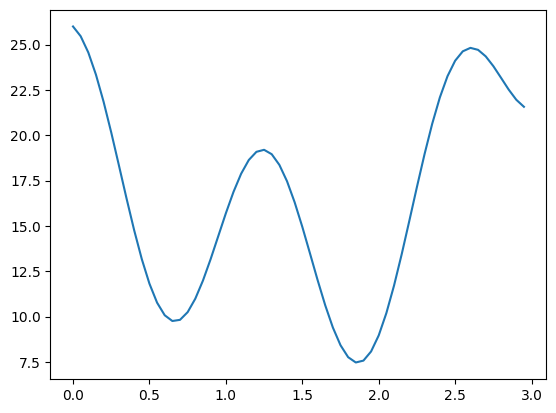

In [132]:
import matplotlib.pyplot as plt


_ = plt.plot(np.arange(0,3,0.05),
        np.vectorize(to_integrate)(np.arange(0,3,0.05))   
        )

Разбиваем наш интервал интегрирования на N промежутков

In [116]:
def split_interval(a,b, N):
    step = (b-a)/N
    lst = [a]
    for i in range(N-1):
        lst.append(lst[-1]+step)
    lst.append(b)
    return lst

split_interval(0,2,10)
    

[0,
 0.2,
 0.4,
 0.6000000000000001,
 0.8,
 1.0,
 1.2,
 1.4,
 1.5999999999999999,
 1.7999999999999998,
 2]

In [154]:
# 0, 10, 45
step = 10/46
s = 0
for i in range(46):
    s+=step
    
print(s)

10.000000000000002


In [112]:
print(my_new_var)
my_new_var = 1

NameError: name 'my_new_var' is not defined

Интегрируем функцию "по методу Трапеций"

In [114]:
del split_interval

In [115]:
def integrate(function,a = 0, b=2, N = 10000):
    step = (b-a)/N
    function_values = [function(i) for i in split_interval(a,b,N)]
    trapeze = []
    for i in range(1, N+1):
        trapeze.append((function_values[i]+function_values[i-1])*step/2)
    return sum(trapeze)
    

In [117]:
integrate(to_integrate, a = 0, b=2, N = 10000)

29.347174761335495

In [16]:
def integral(x):
    return 28*x**4/4 -7*x**2/2 + sin(x)


In [17]:
integral(2)-integral(0)

98.90929742682569

In [111]:
from scipy.integrate import quad
quad(to_integrate,0,2)

(29.34717466693275, 1.713079232667336e-12)

In [19]:
quad??

In [3]:
# Список
a = [1,2,3,4,6,34,6,335,777,876]

# Функция, которая возвращает число, цифры которого разделены символом _ и превращены в строку
import re

def to_str(x):
    return '_'.join(re.findall(r'\d',str(x)))

list(map(to_str,a))

['1', '2', '3', '4', '6', '3_4', '6', '3_3_5', '7_7_7', '8_7_6']

Обнулим в списке все числа, не кратные 3

In [49]:
a = [1,3,4,6]
list(map(lambda x: x if x % 3 == 0 else 0, a))

[0, 3, 0, 6]

Заметим, что в if здесь используется тот же синтаксис, что был в списковых включениях и генераторах списков.

А еще есть прекрасная функция для фильтрации списков, которая работает аналогично map. Называется она filter. Пусть мы хотим отфильтровать все числа меньше 4 из списка. С помощью цикла это можно сделать вот так:

In [8]:
numbers = [1,2,3,4,5]
numbers_under_4 = []
for number in numbers:
    if number < 4:
        numbers_under_4.append(number)
numbers_under_4

[1, 2, 3]

А с помощью спискового включения вот так:

In [118]:
numbers = [1,2,3,4,5]
numbers_under_4 = [number for number in numbers if number < 4]
numbers_under_4

[1, 2, 3]

А чудо-функция filter сработает вот так:

In [120]:
numbers = [1,2,3,4,5]
numbers_under_4 = list(filter(lambda x: x < 4, numbers))
numbers_under_4

[1, 2, 3]

Видно, что синтаксис такой же, как и у map. первый аргумент - функция, которую надо применять, а второй - коллекция, на которую надо применять. Но как и для map, функция возвращает итератор, поэтому, чтобы получить список, его нужно обернуть функцией list.

## Напоминание про генераторы списков

In [164]:
x = (i**2 for i in range(10))



generator

In [175]:
next(x)

StopIteration: 

### Задачка 1: Напишите функцию для вычисления факториала данного числа без рекурсии 
### (что бы это ни было :)    )

Ввод: 3

Вывод: 6

In [14]:
for i in range(1,1):
    print(i)

In [121]:
def factorial(N):
#Ваше решение
    fact = 1
    for i in range(1,N+1):
        fact*=i
    return fact

In [122]:
factorial(4)

24

### Рекурсия

Рекурсия — это техника в Computer Science, когда функция вызывает сама себя. Самый известный пример — вычисление факториала n! = n * n — 1 * n -2 * … 2 *1. Зная, что 0! = 1, факториал можно записать следующим образом:

In [18]:
def factorial(n):
    if n != 1:
        return n * factorial(n-1)
    else:
        return 1

# В этой реализации есть некоторые проблемы, но мы поговорим об этом потом :)

In [19]:
factorial(5)

120

Каждый раз, когда функция вызывает себя и сохраняет некоторую память. Таким образом, рекурсивная функция может содержать гораздо больше памяти, чем традиционная функция. Python останавливает вызовы функций после глубины в 1000 вызовов. Если вы запустите этот пример, получите ошибку.

In [123]:
def factorial(n):
    if n == 1:
        return 1
    else:
        return n * factorial(n-1)

print(factorial(3000))

RecursionError: maximum recursion depth exceeded in comparison

In [181]:
x = 'gfsahjk'
x

'gfsahjk'

In [182]:
_

'gfsahjk'

А еще таким же образом можно вычислять N-ое число Фибоначчи (они как раз задаются рекурсивно).
Заодно здесь мы видим, что выражений return может быть несколько (для различных условий)

In [124]:
def fibonacci_rec(n):
    if n in (1, 2):
        return 1
    return fibonacci_rec(n - 1) + fibonacci_rec(n - 2)

In [131]:
fibonacci(40)

102334155

In [130]:
def fibonacci(n):
    if n in (1, 2):
        return 1
    f1 = 1
    f2 = 1
    for _ in range(n-2):
        f3 = f1 + f2 
        f1 = f2
        f2 = f3
    return f3

In [24]:
from time import time

1664382752.741942

In [32]:
start = time()
x = fibonacci_rec(38)
end = time()

end - start

8.405293703079224

In [33]:
start = time()
x = fibonacci(38)
end = time()

end - start

7.176399230957031e-05

In [28]:
# fibonacci(10)
'ololo'

'ololo'

### Рекурсивно посчитать сумму чисел от 1 до N

Вход: N

Выход: sum(1,2,3,...,N)


Вход: 3

Выход: 6

In [30]:
def summe(n):
    if n == 0:
        return 0
    return n + summe(n - 1)

In [32]:
summe(10)

55

### Рекурсивно проверить, является ли строка палиндромом

Вход: ололо

Выход: True


Вход: You shall not pass!

Выход: False

In [39]:
x = 'ололо'
x[::-1] == x[:]

True

In [13]:
def IsPalindrome(S):
    if len(S) <= 1:
        return True
    else:
        return S[0] == S[-1] and IsPalindrome(S[1:-1])

In [14]:
IsPalindrome('ололо')

True

### Очень полезный пример про рекурсию
### Быстрое возведение в степень

Одним из полезных применений рекурсии является алгоритм быстрого возведения в степень. Если вычислять степень числа a в степень N при помощи простого цикла, то понадобится n-1 умножение. Но можно решить все это быстрее, воспользовавшись рекуррентными соотношениями:

Для нечетных N: \begin{eqnarray} a^n = a^{n-1}a \end{eqnarray} 

Для четных N: \begin{eqnarray} a^n = (a^{n/2})^2 \end{eqnarray}

Это позволяет записать алгоритм, который будет выполнять не более чем за: \begin{eqnarray} 2*log_2(n) \end{eqnarray} умножений

In [34]:
def power(a, n):
    if n == 0:
        return 1
    elif n % 2 == 1:
        return power(a, n - 1) * a
    else:
        return power(a, n // 2) ** 2

In [ ]:
def foo(x):
    if isinstance(x, str) is True:
        return x.upper()
    if isinstance(x, int) is True:
        return x**4
    

In [35]:
power(2,20)

1048576

### Возврат нескольких значений

Нужно упомянуть еще один факт: по команде return функция может возвращать несколько значений. Например вот функция, которая умеет выводить сумму и разность двух аргументов функции:

In [45]:
def sum_diff(a,b):
    return a+b, a-b

summ, diff = sum_diff(4,1)
print(summ)
print(diff)

x,y = (1,2)
print(x,y)

5
3
1 2


In [46]:
x, y, z = 0, 0, 0

### Генераторы
Мы уже сталкивались с понятием генератора (специального способа создания итераторов). Мы уже делали их с помощью генераторов списков (пишется списковое включение в круглых скобках). Есть еще один способ создания генераторов - через написание функций с последующей заменой выражения return на yield. Давайте посмотрим:

In [133]:
int_generator = (i**2 for i in range(10000))

In [137]:
next(int_generator)

4

In [141]:
def createGenerator():
    mylist = range(3)
    for i in mylist:
        yield i*i

In [143]:
x = createGenerator()

In [142]:
type(createGenerator())

generator

In [45]:
1 - (1 - 0.001)**100

0.09520785288629108

In [37]:
type(createGenerator)

function

In [43]:
mygenerator = createGenerator()
print(type(mygenerator))
for i in mygenerator:
     print(i)

<class 'generator'>
0
1
4


In [30]:
mygenerator = createGenerator()
print(next(mygenerator))
print(next(mygenerator))
print(next(mygenerator))
print(next(mygenerator))

0
1
4


StopIteration: 

В данном случае пример бесполезный, но это удобно, если вы знаете, что функция вернёт большой набор значений, который надо будет прочитать только один раз.

Чтобы освоить yield, вы должны понимать, что когда вы вызываете функцию, код внутри тела функции не исполняется. Функция только возвращает объект-генератор — немного мудрёно :-)

Ваш код будет вызываться каждый раз, когда for обращается к генератору.

Теперь трудная часть:

В первый запуск вашей функции, она будет исполняться от начала до того момента, когда она наткнётся на yield — тогда она вернёт первое значение из цикла. На каждый следующий вызов будет происходить ещё одна итерация написанного вами цикла, возвращаться будет следующее значение — и так пока значения не кончатся.


Например можно написать генератор бесконечной последовательности, который будет вызывать элемент в тот момент, когда будет выполнять с ним какие-то действия:

In [148]:
def infinite_sequence():
    num = 0
    while True:
        yield num
        num += 1

In [149]:
type(infinite_sequence)

function

In [150]:
gen = infinite_sequence()

print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

0
1
2
3


Давайте вернемся к числам Фибоначчи и будем генерировать их с помощью генератора

In [151]:
def fib(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

In [64]:
a = 2 
b = 3


In [51]:
import math

math.log(1000000)*1000000

13815510.557964273

In [23]:
a,b = b,a

In [63]:
a = fib(10)
print(next(a))
print(next(a))
print(next(a))
print(next(a))
print(next(a))
print(next(a))

0
1
1
2
3
5


Тут мы использовали еще одну классную конструкцию: for _ in collection. Это означает, что переменную из collection нам использовать не нужно - просто нужно выполнить операцию столько раз, сколько в коллекции элементов. Это что-то вроде конвенции (Если не хотим использовать переменную из collection, то при проходе в цикле for стандартное i, например, заменяется на _. 

Также этот символ может быть использован для того, чтобы достать последнее значение из интерпретатора:

In [24]:
5+5

10

In [25]:
# Ожидаемо это 10
_

10

In [26]:
# а еще с ним можно производить стандартные операции
_+1

11

In [27]:
# А тут в _ уже перезаписалось 11
_

11

In [28]:
# А еще можно присвоить это значение новой переменной!
x = _
x

11

### Декораторы
Декораторы — это, по сути, "обёртки", которые дают нам возможность изменить поведение функции, не изменяя её код.
Звучит мудрёно. Посмотрим на пример:

In [152]:
def my_shiny_new_decorator(function_to_decorate):
    # Внутри себя декоратор определяет функцию-"обёртку". Она будет обёрнута вокруг декорируемой,
    # получая возможность исполнять произвольный код до и после неё.
    def the_wrapper_around_the_original_function():
        print("Я - код, который отработает до вызова функции")
        function_to_decorate() # Сама функция
        print("А я - код, срабатывающий после")
    # Вернём эту функцию
    return the_wrapper_around_the_original_function

In [153]:
def stand_alone_function():
    print("Я простая одинокая функция, ты ведь не посмеешь меня изменять?")

stand_alone_function()

Я простая одинокая функция, ты ведь не посмеешь меня изменять?


In [154]:
# Однако, чтобы изменить её поведение, мы можем декорировать её, то есть просто передать декоратору,
# который обернет исходную функцию в любой код, который нам потребуется, и вернёт новую,
# готовую к использованию функцию:
stand_alone_function_decorated = my_shiny_new_decorator(stand_alone_function)
stand_alone_function_decorated()

Я - код, который отработает до вызова функции
Я простая одинокая функция, ты ведь не посмеешь меня изменять?
А я - код, срабатывающий после


In [57]:
stand_alone_function()

Я простая одинокая функция, ты ведь не посмеешь меня изменять?


Декораторы могут быть использованы для расширения возможностей функций из сторонних библиотек (код которых мы не можем изменять), или для упрощения отладки (мы не хотим изменять код, который ещё не устоялся).

Также полезно использовать декораторы для расширения различных функций одним и тем же кодом, без повторного его переписывания каждый раз.

### Пример 1. Декоратор для вычисления времени работы функции:

In [157]:
import time
time.perf_counter()

466853.605137296

In [27]:
# Декоратор 1
def benchmark(func):
    """
    Декоратор, выводящий время, которое заняло
    выполнение декорируемой функции.
    """
    import time
    def wrapper(*args, **kwargs):
        t = time.perf_counter() # Засекли время начала выполнения
        res = func(*args, **kwargs) # Запустили
        print(func.__name__, time.perf_counter() - t) # Засекли время окончания исполнения и вывели время конца- время начала
        return res
    return wrapper

# Декоратор 2
def logging(func):
    """
    Декоратор, который выводит вызовы функции.
    """
    def wrapper(*args, **kwargs):
        res = func(*args, **kwargs)
        print(func.__name__, args, kwargs)
        return res
    return wrapper

# Декоратор 3
def counter(func):
    """
    Декоратор, считающий и выводящий количество вызовов
    декорируемой функции.
    """
    def wrapper(*args, **kwargs):
        wrapper.count += 1
        res = func(*args, **kwargs)
        print ("{0} была вызвана: {1}x".format(func.__name__, wrapper.count))
        return res
    wrapper.count = 0
    return wrapper

In [29]:
@benchmark 
# @logging
# @counter
def reverse_string(string):
    return ''.join(reversed(string))

In [30]:
print(reverse_string("А роза упала на лапу Азора"))

reverse_string 7.70800033933483e-06
арозА упал ан алапу азор А


Те же самые декораторы можно запустить для любой функции. Например, для функции, которая считает количество вхождений некоторого слова в текст романа Достоевского "Идиот"

In [40]:
import requests
import re
from random import randint
@benchmark
@logging
@counter
def get_random_idiot_word_count(word):
    the_idiot_url = 'https://www.gutenberg.org/files/2638/2638-0.txt'

    # Отправляем запрос в библиотеку Gutenberg и забираем текст
    raw = requests.get(the_idiot_url).text
    #Заменим в тексте все небуквенные символы на пробелы
    processed_book = re.sub('[\W]+' , ' ', raw).lower()
    return len(re.findall(word.lower(),processed_book))

get_random_idiot_word_count('whole')

get_random_idiot_word_count была вызвана: 1x
wrapper ('whole',) {}
wrapper 2.45085082300011


176

In [75]:
%%time
### Решение 1

def factorial(n):
    f = 1
    for i in range(2, n+1):
        f = f * i
    return f
factorial(200)


CPU times: user 33 µs, sys: 1 µs, total: 34 µs
Wall time: 36 µs


788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000

Один из суперполезных способов использования декоратора – [мемоизация](https://ru.wikipedia.org/wiki/Мемоизация) aka кэширование. По сути, это способ "переиспользовать" предыдущие результаты вместо того, чтобы по 25 раз считать одно и то же. Рекомендую заглянуть [сюда](https://habr.com/ru/post/335866/)

In [25]:
def memo(f):
    """
    Запомнить результаты исполнения функции f, 
    чьи аргументы args должны быть хешируемыми.
    """
    cache = {}
    def fmemo(*args):
        if args not in cache:
            cache[args] = f(*args)
        return cache[args]
    fmemo.cache = cache
    return fmemo



Иллюстрацию того, что мемоизация - суперполезная штука, можно произвести на примере расчета чисел Фибоначчи. Если вы программист, они вам, наверняка, уже оскомину набили, но мы все равно на них посмотрим.

In [26]:
import time

@memo
def fib(n):
    if n < 2:
        return n
    return fib(n-2) + fib(n-1)

# Какое число мы хотим посчитать
x = 40

t1 = time.perf_counter()
print(f'fib({x}) =', fib(x))
print(time.perf_counter() - t1)

fib(40) = 102334155
0.00041895799949998036


28.9 секунд. Это ОЧЕНЬ долго. 

In [163]:
import time
@memo
def fib(n):
    if n < 2:
        return n
    return fib(n-2) + fib(n-1)

# Какое число мы хотим посчитать
x = 40

t1 = time.perf_counter()
print(f'fib({x}) =', fib(x))
print(time.perf_counter() - t1)

fib(40) = 102334155
0.0003602720098569989


Как вам ускорение? :)

In [24]:
t = time.perf_counter()
time.sleep(2)
time.perf_counter() - t

2.00310606797575

In [80]:
t1 = time.perf_counter()
print(f'fib({x}) =', fib(x))
print(time.perf_counter() - t1)

fib(40) = 102334155
0.00014527999974234262


# Аннотация типов

    int, str, bool, float, None

In [5]:
price: int 
title: str
    
is_true: bool = True


In [3]:
price = 's'

In [11]:
def indent_right(s: str, width: int) -> str:
    return " "*max(0, width)+s

indent_right('s', '2')

TypeError: '>' not supported between instances of 'str' and 'int'

Что если составные типы? Что если функция возвращает разные типы?

In [9]:
def indent_right(s: str, width: int) -> str:
    '''
    Получает строку, добавляет width пробелов слева
    '''
    assert isinstance(s, str)
    assert isinstance(width, int)
    
    return " "* max(0,width) + s 

In [10]:
indent_right('2','2')

AssertionError: 

In [205]:

from typing import Optional, Union

In [199]:
# Неправильно
amount: int
amount = None

# Правильно
price: Optional[int]
price = None

In [201]:
def indent_right(s: str, width: int) -> Optional[str]:
    '''
    Получает строку, добавляет width пробелов слева
    '''
    assert isinstance(s, str)
    assert isinstance(width, int)
    
    return " "* max(0,width) + s if width >=0 else None

In [208]:
def hundreds(x: Union[int, float]) -> int:
    return (int(x)//100)%10

    Union[тип, None] == Optional[тип]

# Описание коллекций

In [12]:
from typing import List, Tuple, Dict, Any

In [13]:
titles: List[str] = ['a','b','c']
# Я наврал
titles.append(1000)  

In [14]:
titles: List[Any]

In [15]:
titles = ['str', 1]

In [217]:
prices: Tuple[int] = (1,2)

In [218]:
prices: Tuple[int, str] = (1,'my_element')

In [16]:
book_authors: Dict[str,str] = {'Bradbury': 'Fahrenheit 451'}


In [17]:
book_authors[1984] = 'Orwell'

In [221]:
book_authors

{'Bradbury': 'Fahrenheit 451', 1984: 'Orwell'}

In [18]:
from typing import NoReturn

In [19]:
def foo() -> NoReturn:
    while True:
        pass